<h1><center>Polynomial Regression</center></h1>


### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Reading the data in

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Lets plot Emission values with respect to Engine size:

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

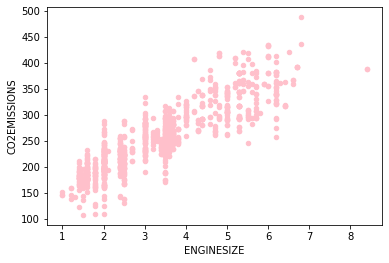

In [4]:
cdf.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS', color='pink')

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [7]:
model = LinearRegression()
model.fit(train_x_poly, train_y)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [[ 0.         49.36627228 -1.3212859 ]]
Intercept: [108.21549958]


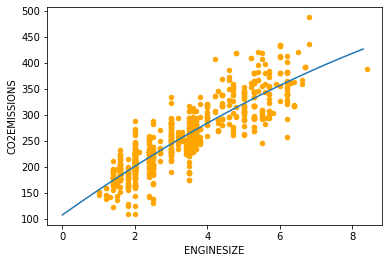

In [8]:
coef_0, coef_1, coef_2 = model.coef_[0]
intercept = model.intercept_[0]

xx = np.arange(0.0, float(max(train['ENGINESIZE'])), 0.1)
yy = intercept + coef_1*xx + coef_2*(xx**2)

train.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS', color='orange')
plt.plot(xx, yy)

<h2 id="evaluation">Evaluation</h2>

In [9]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
predictions = model.predict(test_x_poly)

mae = np.mean(np.absolute(predictions - test_y))
mse = np.mean((predictions - test_y)**2)
r2 = r2_score(predictions, test_y)

print(f'MAE: {mae}\nMSE: {mse}\nR2: {r2}')

MAE: 24.564112001859954
MSE: 1017.5077447932864
R2: 0.6628126112723267
